In [35]:
# coding: utf-8

# 간단한 XOR Table을 학습하는 NN을 구성하는 문제입니다.
# 
#  1-Layer, 2-Layer model을 각각 구성하여 XOR 결과를 비교합니다.
#  1-Layer, 2-Layer의 model을 feedforward network와 Backpropagation을 이용하여 학습시킵니다.
#  주어진 양식을 활용해 주시며, scale, 차원의 순서, hyper parameter등은 결과가 잘 나오는 방향으로 Tuning하셔도 무방합니다.
#  Layer의 Activation 함수인 Tanh는 49~52번째 줄의 함수를 사용하시면 됩니다.
# 


import numpy as np
import random
import matplotlib.pyplot as plt



In [36]:

# Hyper parameters
## 학습의 횟수와 Gradient update에 쓰이는 learning rate입니다.
## 다른 값을 사용하여도 무방합니다.
epochs = 10000
learning_rate = 0.05


In [37]:

# Input data setting
## XOR data 
## 입력 데이터들, XOR Table에 맞게 정의해놓았습니다.
train_inp = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
train_out = np.array([0, 1, 1, 0])


##-----------------------------------##
##------- Activation Function -------##
##-----------------------------------##
def sigmoid(x):
    return 1 / (1 + np.exp(-x))



epoch [0/10000] loss: 0.2500
epoch [500/10000] loss: 0.0949
epoch [1000/10000] loss: 0.0318
epoch [1500/10000] loss: 0.0368
epoch [2000/10000] loss: 0.9890
epoch [2500/10000] loss: 0.0086
epoch [3000/10000] loss: 0.0128
epoch [3500/10000] loss: 0.0134
epoch [4000/10000] loss: 0.0128
epoch [4500/10000] loss: 0.0098
epoch [5000/10000] loss: 0.0095
epoch [5500/10000] loss: 0.0014
epoch [6000/10000] loss: 0.9994
epoch [6500/10000] loss: 0.9995
epoch [7000/10000] loss: 0.0008
epoch [7500/10000] loss: 0.0007
epoch [8000/10000] loss: 0.9997
epoch [8500/10000] loss: 0.0005
epoch [9000/10000] loss: 0.0040
epoch [9500/10000] loss: 0.0004
input:  [[0 0]] , answer:  0 , pred: 0.0188
input:  [[0 1]] , answer:  1 , pred: 0.9388
input:  [[1 0]] , answer:  1 , pred: 0.9390
input:  [[1 1]] , answer:  0 , pred: 0.9999


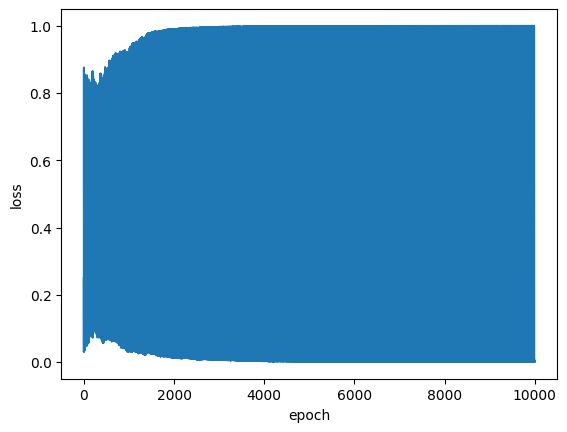

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize weights and biases
W1_1 = np.random.randn(2, 1)  # First layer weights
b1_1 = np.zeros((1, 1))  # First layer biases

errors = []
for epoch in range(epochs):
    # 데이터 4가지 중 랜덤으로 하나 선택
    idx = np.random.randint(4)

    # 입력 데이터 xin과 해당하는 정답 ans 불러오기
    xin = train_inp[idx].reshape(1, 2)
    ans = train_out[idx]

    # Forward Pass
    net1 = sigmoid(np.matmul(xin, W1_1) + b1_1)

    # Mean Squared Error (MSE)로 loss 계산
    predictions = net1
    targets = ans
    loss = np.mean((predictions - targets) ** 2)

    # Backpropagation을 통한 Weight의 Gradient calculation(update)
    delta_W1 = np.matmul(xin.T, 2 * (predictions - targets) * (1 - net1**2))
    delta_b1 = 2 * (predictions - targets) * (1 - net1**2)

    # 각 weight의 update 반영
    W1_1 -= learning_rate * delta_W1
    b1_1 -= learning_rate * delta_b1

    # 500번째 epoch마다 loss를 프린트합니다.
    if epoch % 500 == 0:
        print("epoch [{}/{}] loss: {:.4f}".format(epoch, epochs, float(loss)))

    # plot을 위해 값 저장
    errors.append(loss)

for idx in range(4):
    xin = train_inp[idx].reshape(1, 2)
    ans = train_out[idx]

    net1 = sigmoid(np.matmul(xin, W1_1) + b1_1)

    pred = net1.item() 

    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred)))

# 학습이 끝난 후, loss를 확인합니다.
loss = np.array(errors)
plt.plot(loss.reshape(epochs))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

np.savetxt("20161529_weight_layer1.txt", (W1_1), fmt="%s")
np.savetxt("20161529_bias_layer1.txt", (b1_1), fmt="%s")


epoch [0/10000] loss: 0.0824
epoch [500/10000] loss: 0.3553
epoch [1000/10000] loss: 0.0935
epoch [1500/10000] loss: 0.2512
epoch [2000/10000] loss: 0.1410
epoch [2500/10000] loss: 0.0702
epoch [3000/10000] loss: 0.0055
epoch [3500/10000] loss: 0.0839
epoch [4000/10000] loss: 0.0486
epoch [4500/10000] loss: 0.0401
epoch [5000/10000] loss: 0.0133
epoch [5500/10000] loss: 0.0191
epoch [6000/10000] loss: 0.0011
epoch [6500/10000] loss: 0.0012
epoch [7000/10000] loss: 0.0248
epoch [7500/10000] loss: 0.0399
epoch [8000/10000] loss: 0.0171
epoch [8500/10000] loss: 0.0099
epoch [9000/10000] loss: 0.0134
epoch [9500/10000] loss: 0.0295
input:  [[0 0]] , answer:  0 , pred: 0.0177
input:  [[0 1]] , answer:  1 , pred: 0.8228
input:  [[1 0]] , answer:  1 , pred: 0.8676
input:  [[1 1]] , answer:  0 , pred: 0.0514


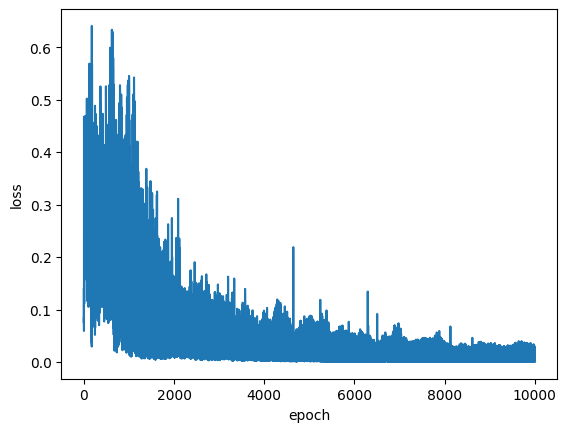

In [39]:
import numpy as np
import matplotlib.pyplot as plt


# Initialize weights and biases
W1_2 = np.random.randn(2, 4)  # First layer weights
b1_2 = np.zeros((1, 4))  # First layer biases
W2_2 = np.random.randn(4, 1)  # Second layer weights
b2_2 = np.zeros((1, 1))  # Second layer biases

errors = []
for epoch in range(epochs):
    # 데이터 4가지 중 랜덤으로 하나 선택
    idx = np.random.randint(4)

    # 입력 데이터 xin과 해당하는 정답 ans 불러오기
    xin = train_inp[idx].reshape(1, 2)
    ans = train_out[idx]

    # Forward Pass
    net1 = sigmoid(np.matmul(xin, W1_2) + b1_2)
    net2 = sigmoid(np.matmul(net1, W2_2) + b2_2)

    # Mean Squared Error (MSE)로 loss 계산
    predictions = net2
    targets = ans
    loss = np.mean((predictions - targets) ** 2)

    # Backpropagation을 통한 Weight의 Gradient calculation(update)
    delta_W2 = np.matmul(net1.T, 2 * (predictions - targets) * (1 - net2**2))
    delta_b2 = 2 * (predictions - targets) * (1 - net2**2)
    delta_W1 = np.matmul(xin.T, np.matmul(2 * (predictions - targets) * (1 - net2**2), W2_2.T) * (1 - net1**2))
    delta_b1 = np.matmul(2 * (predictions - targets) * (1 - net2**2), W2_2.T) * (1 - net1**2)

    # 각 weight의 update 반영
    W2_2 -= learning_rate * delta_W2
    b2_2 -= learning_rate * delta_b2
    W1_2 -= learning_rate * delta_W1
    b1_2 -= learning_rate * delta_b1

    # 500번째 epoch마다 loss를 프린트합니다.
    if epoch % 500 == 0:
        print("epoch [{}/{}] loss: {:.4f}".format(epoch, epochs, float(loss)))

    # plot을 위해 값 저장
    errors.append(loss)

for idx in range(4):
    xin = train_inp[idx].reshape(1, 2)
    ans = train_out[idx]

    net1 = sigmoid(np.matmul(xin, W1_2) + b1_2)
    net2 = sigmoid(np.matmul(net1, W2_2) + b2_2)

    pred = net2

    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred)))


# 학습이 끝난 후, loss를 확인합니다.
loss = np.array(errors)
plt.plot(loss.reshape(epochs))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()


np.savetxt("20161529_weight1_layer2.txt", (W1_2), fmt="%s")
np.savetxt("20161529_bias1_layer2.txt", (b1_2), fmt="%s")
np.savetxt("20161529_weight2_layer2.txt", (W2_2), fmt="%s")
np.savetxt("20161529_bias2_layer2.txt", (b2_2), fmt="%s")


In [40]:
#-----------------------------------#
#--------- Testing Step ------------#
#-----------------------------------#

for idx in range(4):
    xin = train_inp[idx].reshape(1,2)
    ans = train_out[idx]
    
    # 1-layer의 경우 net2는 사용하지 않아도 됩니다, 위에서 본인이 설정한 변수대로 진행하시면 됩니다.
    net1_1 = sigmoid(np.matmul(xin,W1_1)+b1_1)

    net1_2 = sigmoid(np.matmul(xin,W1_2)+b1_2)
    net2_2 = sigmoid(np.matmul(net1_2,W2_2)+b2_2)

    pred1 = net1_1 # ans와 가까울 수록 잘 학습된 것을 의미합니다.
    pred2 = net2_2
    
    print("layer1")
    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred1)))
    print("layer2")
    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred2)))
    print("-------------------------------------")
    


#-----------------------------------#
#--------- Weight Saving -----------#
#-----------------------------------#

# weight, bias를 저장하는 부분입니다.

    #layer 1개인 경우
#np.savetxt("layer1_weight",(W1, b1),fmt="%s")

    #layer 2개인 경우
#np.savetxt("layer2_weight",(W1, W2, b1, b2),fmt="%s")

layer1
input:  [[0 0]] , answer:  0 , pred: 0.0188
layer2
input:  [[0 0]] , answer:  0 , pred: 0.0177
-------------------------------------
layer1
input:  [[0 1]] , answer:  1 , pred: 0.9388
layer2
input:  [[0 1]] , answer:  1 , pred: 0.8228
-------------------------------------
layer1
input:  [[1 0]] , answer:  1 , pred: 0.9390
layer2
input:  [[1 0]] , answer:  1 , pred: 0.8676
-------------------------------------
layer1
input:  [[1 1]] , answer:  0 , pred: 0.9999
layer2
input:  [[1 1]] , answer:  0 , pred: 0.0514
-------------------------------------
